In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import re

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
with open('/Users/taweewat/Documents/data_visualization/gre_score/p2.txt') as f:
    c1 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/p3.txt') as f:
    c2 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/p4.txt') as f:
    c3 = f.readlines()
content=c1+c2+c3


In [3]:
with open('/Users/taweewat/Documents/data_visualization/gre_score/q2.txt') as f:
    c1 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/q3.txt') as f:
    c2 = f.readlines()
with open('/Users/taweewat/Documents/data_visualization/gre_score/q4.txt') as f:
    c3 = f.readlines()
content14=c1+c2+c3

columns = ['PGRE','QGRE','VGRE','WGRE','a_GPA','major_GPA']
j=0
df14= pd.DataFrame(columns=columns)

myReg=re.compile(r'([QVWP](?:</span>)?:(?:</span>)?.\d*\.?\d*\%?)|(GPA in Major(?:</span>)?:(?:</span>)?..\d*\.?\d*)|(Overall GPA(?:</span>)?:(?:</span>)?..\d*\.?\d*)')
regnum=re.compile(r'\d\.?\d*')

for text in content14:
    if myReg.search(text) != None:
        if len(myReg.findall(text))<=6: 
#             print(myReg.findall(text))
            for tt in myReg.findall(text):
                if tt[0]!='':
                    try:
                        df14.loc[j,'%sGRE'%tt[0][0]]=float(regnum.search(tt[0]).group())
                    except:
                        pass
                elif tt[1]!='':
                    try:
                        df14.loc[j,'major_GPA']=float(regnum.search(tt[1]).group())
                    except:
                        pass
                elif tt[2]!='':
                    try:
                        df14.loc[j,'a_GPA']=float(regnum.search(tt[2]).group())       
                    except:
                        pass
        j=j+1

In [4]:
columns = ['PGRE','QGRE','VGRE','WGRE','a_GPA','major_GPA']
j=0
df= pd.DataFrame(columns=columns)

myReg=re.compile(r'([QVWP](?:</span>)?:(?:</span>)?.\d*\.?\d*\%?)|(GPA in Major(?:</span>)?:(?:</span>)?..\d*\.?\d*)|(Overall GPA(?:</span>)?:(?:</span>)?..\d*\.?\d*)')
regnum=re.compile(r'\d\.?\d*')

for text in content:
    if myReg.search(text) != None:
        if len(myReg.findall(text))<=6: 
#             print(myReg.findall(text))
            for tt in myReg.findall(text):
                if tt[0]!='':
                    try:
                        df.loc[j,'%sGRE'%tt[0][0]]=float(regnum.search(tt[0]).group())
                    except:
                        pass
                elif tt[1]!='':
                    try:
                        df.loc[j,'major_GPA']=float(regnum.search(tt[1]).group())
                    except:
                        pass
                elif tt[2]!='':
                    try:
                        df.loc[j,'a_GPA']=float(regnum.search(tt[2]).group())       
                    except:
                        pass
        j=j+1

In [5]:
df[df.a_GPA>4.0]=np.nan
df[df.major_GPA>4.0]=np.nan
df[df.QGRE>300]=np.nan
df[df.QGRE<100]=np.nan
df=df.dropna(how='all')

In [6]:
df14[df14.a_GPA>4.0]=np.nan
df14[df14.major_GPA>4.0]=np.nan
df14[df14.QGRE>300]=np.nan
df14[df14.QGRE<100]=np.nan
df14=df14.dropna(how='all')

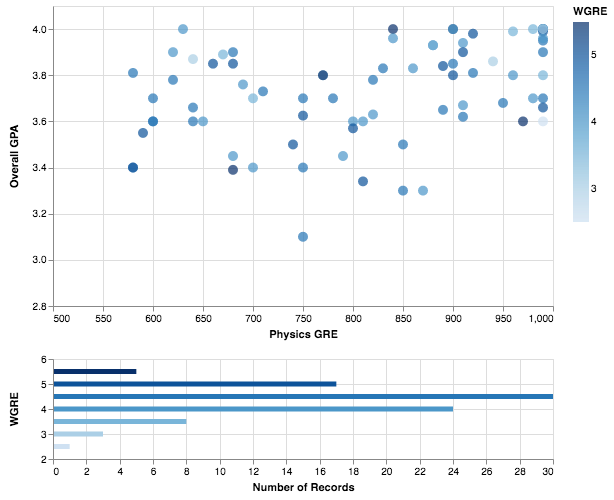

In [7]:
#2015 data
brush = alt.selection(type='interval')

points = alt.Chart().mark_circle(size=100).encode(
    alt.X('PGRE', scale=alt.Scale(domain=(500,1000)), axis=alt.Axis(title='Physics GRE')),
    alt.Y('a_GPA', scale=alt.Scale(domain=(2.8,4.1)), axis=alt.Axis(title='Overall GPA')),
    color=alt.condition(brush, 'WGRE', alt.value('lightgray'))
).properties(
    selection=brush,
    width=500
)

bars = alt.Chart().mark_bar().encode(
    alt.X('count(WGRE):Q', scale=alt.Scale(domain=(0,30))),
    alt.Y('WGRE:Q', scale=alt.Scale(domain=(2.5,5.5))),
    color='WGRE'
).transform_filter(
    brush.ref() 
).properties(
    width=500,
    height=100
)

chart = alt.vconcat(points, bars, data=df)
chart
# chart.savechart('pgre.html')

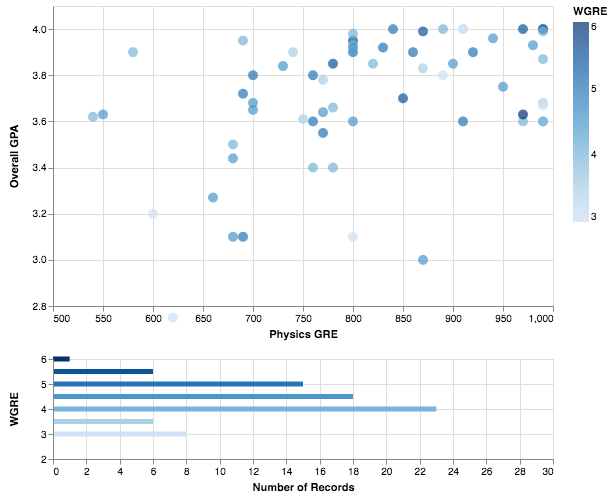

In [8]:
#2014 data
brush = alt.selection(type='interval')

points = alt.Chart().mark_circle(size=100).encode(
    alt.X('PGRE', scale=alt.Scale(domain=(500,1000)), axis=alt.Axis(title='Physics GRE')),
    alt.Y('a_GPA', scale=alt.Scale(domain=(2.8,4.1)), axis=alt.Axis(title='Overall GPA')),
    color=alt.condition(brush, 'WGRE', alt.value('lightgray'))
).properties(
    selection=brush,
    width=500
)

bars = alt.Chart().mark_bar().encode(
    alt.X('count(WGRE):Q', scale=alt.Scale(domain=(0,30))),
    alt.Y('WGRE:Q', scale=alt.Scale(domain=(2.5,5.5))),
    color='WGRE'
).transform_filter(
    brush.ref() 
).properties(
    width=500,
    height=100
)

chart = alt.vconcat(points, bars, data=df14)
chart
# chart.savechart('pgre.html')

In [9]:
alt.Chart(df).mark_point().encode(
    alt.X('PGRE', scale=alt.Scale(domain=(500,1000))),
    alt.Y('a_GPA', scale=alt.Scale(domain=(2.8,4.1))),
    color=alt.condition(brush, 'PGRE', alt.value('lightgray')),
).properties(
    width=500
)


<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


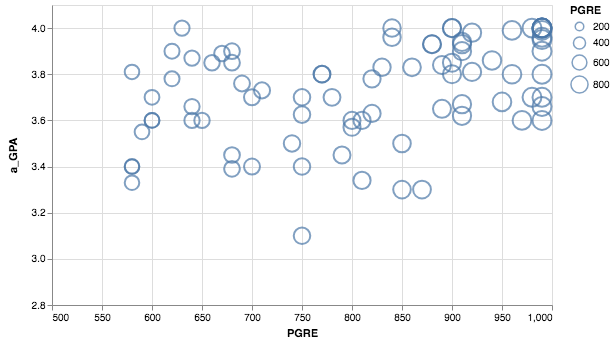

In [10]:
alt.Chart(df).mark_point().encode(
    alt.X('PGRE', scale=alt.Scale(domain=(500,1000))),
    alt.Y('a_GPA', scale=alt.Scale(domain=(2.8,4.1), clamp=True)),
    size='PGRE',
).properties(
    width=500
)
